
# Image Prediction - Shopee-IET dataset

Author: Siti Khotijah

Created on: 7/22/2021


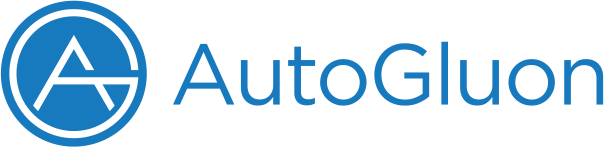

This is different from traditional machine learning where we need to manually define the neural network and then specify the hyperparameters in the training process. Instead, with just a single call to AutoGluon’s fit function, AutoGluon automatically trains many models with different hyperparameter configurations and returns the model that achieved the highest level of accuracy.

In [1]:
%matplotlib inline
!pip install --pre autogluon 
!pip install autogluon
import autogluon.core as ag
from autogluon.vision import ImagePredictor, ImageDataset



     |████████████████████████████████| 342 kB 935 kB/s 
     |████████████████████████████████| 49 kB 1.9 MB/s 
     |████████████████████████████████| 52 kB 642 kB/s 
     |████████████████████████████████| 269 kB 2.6 MB/s 
     |████████████████████████████████| 81 kB 2.4 MB/s 
     |████████████████████████████████| 950 kB 2.8 MB/s 
  Installing build dependencies ... - \ | / - \ | / done
  Getting requirements to build wheel ... - done
    Preparing wheel metadata ... - \ | / - done
     |████████████████████████████████| 206 kB 3.8 MB/s 
     |████████████████████████████████| 119 kB 3.5 MB/s 
     |████████████████████████████████| 2.2 MB 3.6 MB/s 
     |████████████████████████████████| 188 kB 5.3 MB/s 
     |████████████████████████████████| 67.3 MB 20 kB/s 
     |████████████████████████████████| 157 kB 65.1 MB/s 
     |████████████████████████████████| 54 kB 2.0 MB/s 
     |████████████████████████████████| 2.9 MB 55.7 MB/s 
     |████████████████

/opt/conda/lib/python3.7/site-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.8.0` and `torch==1.9.0+cu102` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


# Load an image directory

In [2]:
train_data, _, test_data = ImageDataset.from_folders('../input/shopeeiet-dataset/data/', train='train', test='test')
print('train #', len(train_data), 'test #', len(test_data))
train_data.head()

train # 800 test # 80


,image,label
0,/kaggle/input/shopeeiet-dataset/data/train/Bab...,0
1,/kaggle/input/shopeeiet-dataset/data/train/Bab...,0
2,/kaggle/input/shopeeiet-dataset/data/train/Bab...,0
3,/kaggle/input/shopeeiet-dataset/data/train/Bab...,0
4,/kaggle/input/shopeeiet-dataset/data/train/Bab...,0


In [3]:
# use the train from Shopee-IET dataset as new root
import os
root = os.path.join(os.path.dirname(train_data.iloc[0]['image']), '..')
all_data = ImageDataset.from_folder(root)
all_data.head()

,image,label
0,/kaggle/input/shopeeiet-dataset/data/train/Bab...,0
1,/kaggle/input/shopeeiet-dataset/data/train/Bab...,0
2,/kaggle/input/shopeeiet-dataset/data/train/Bab...,0
3,/kaggle/input/shopeeiet-dataset/data/train/Bab...,0
4,/kaggle/input/shopeeiet-dataset/data/train/Bab...,0


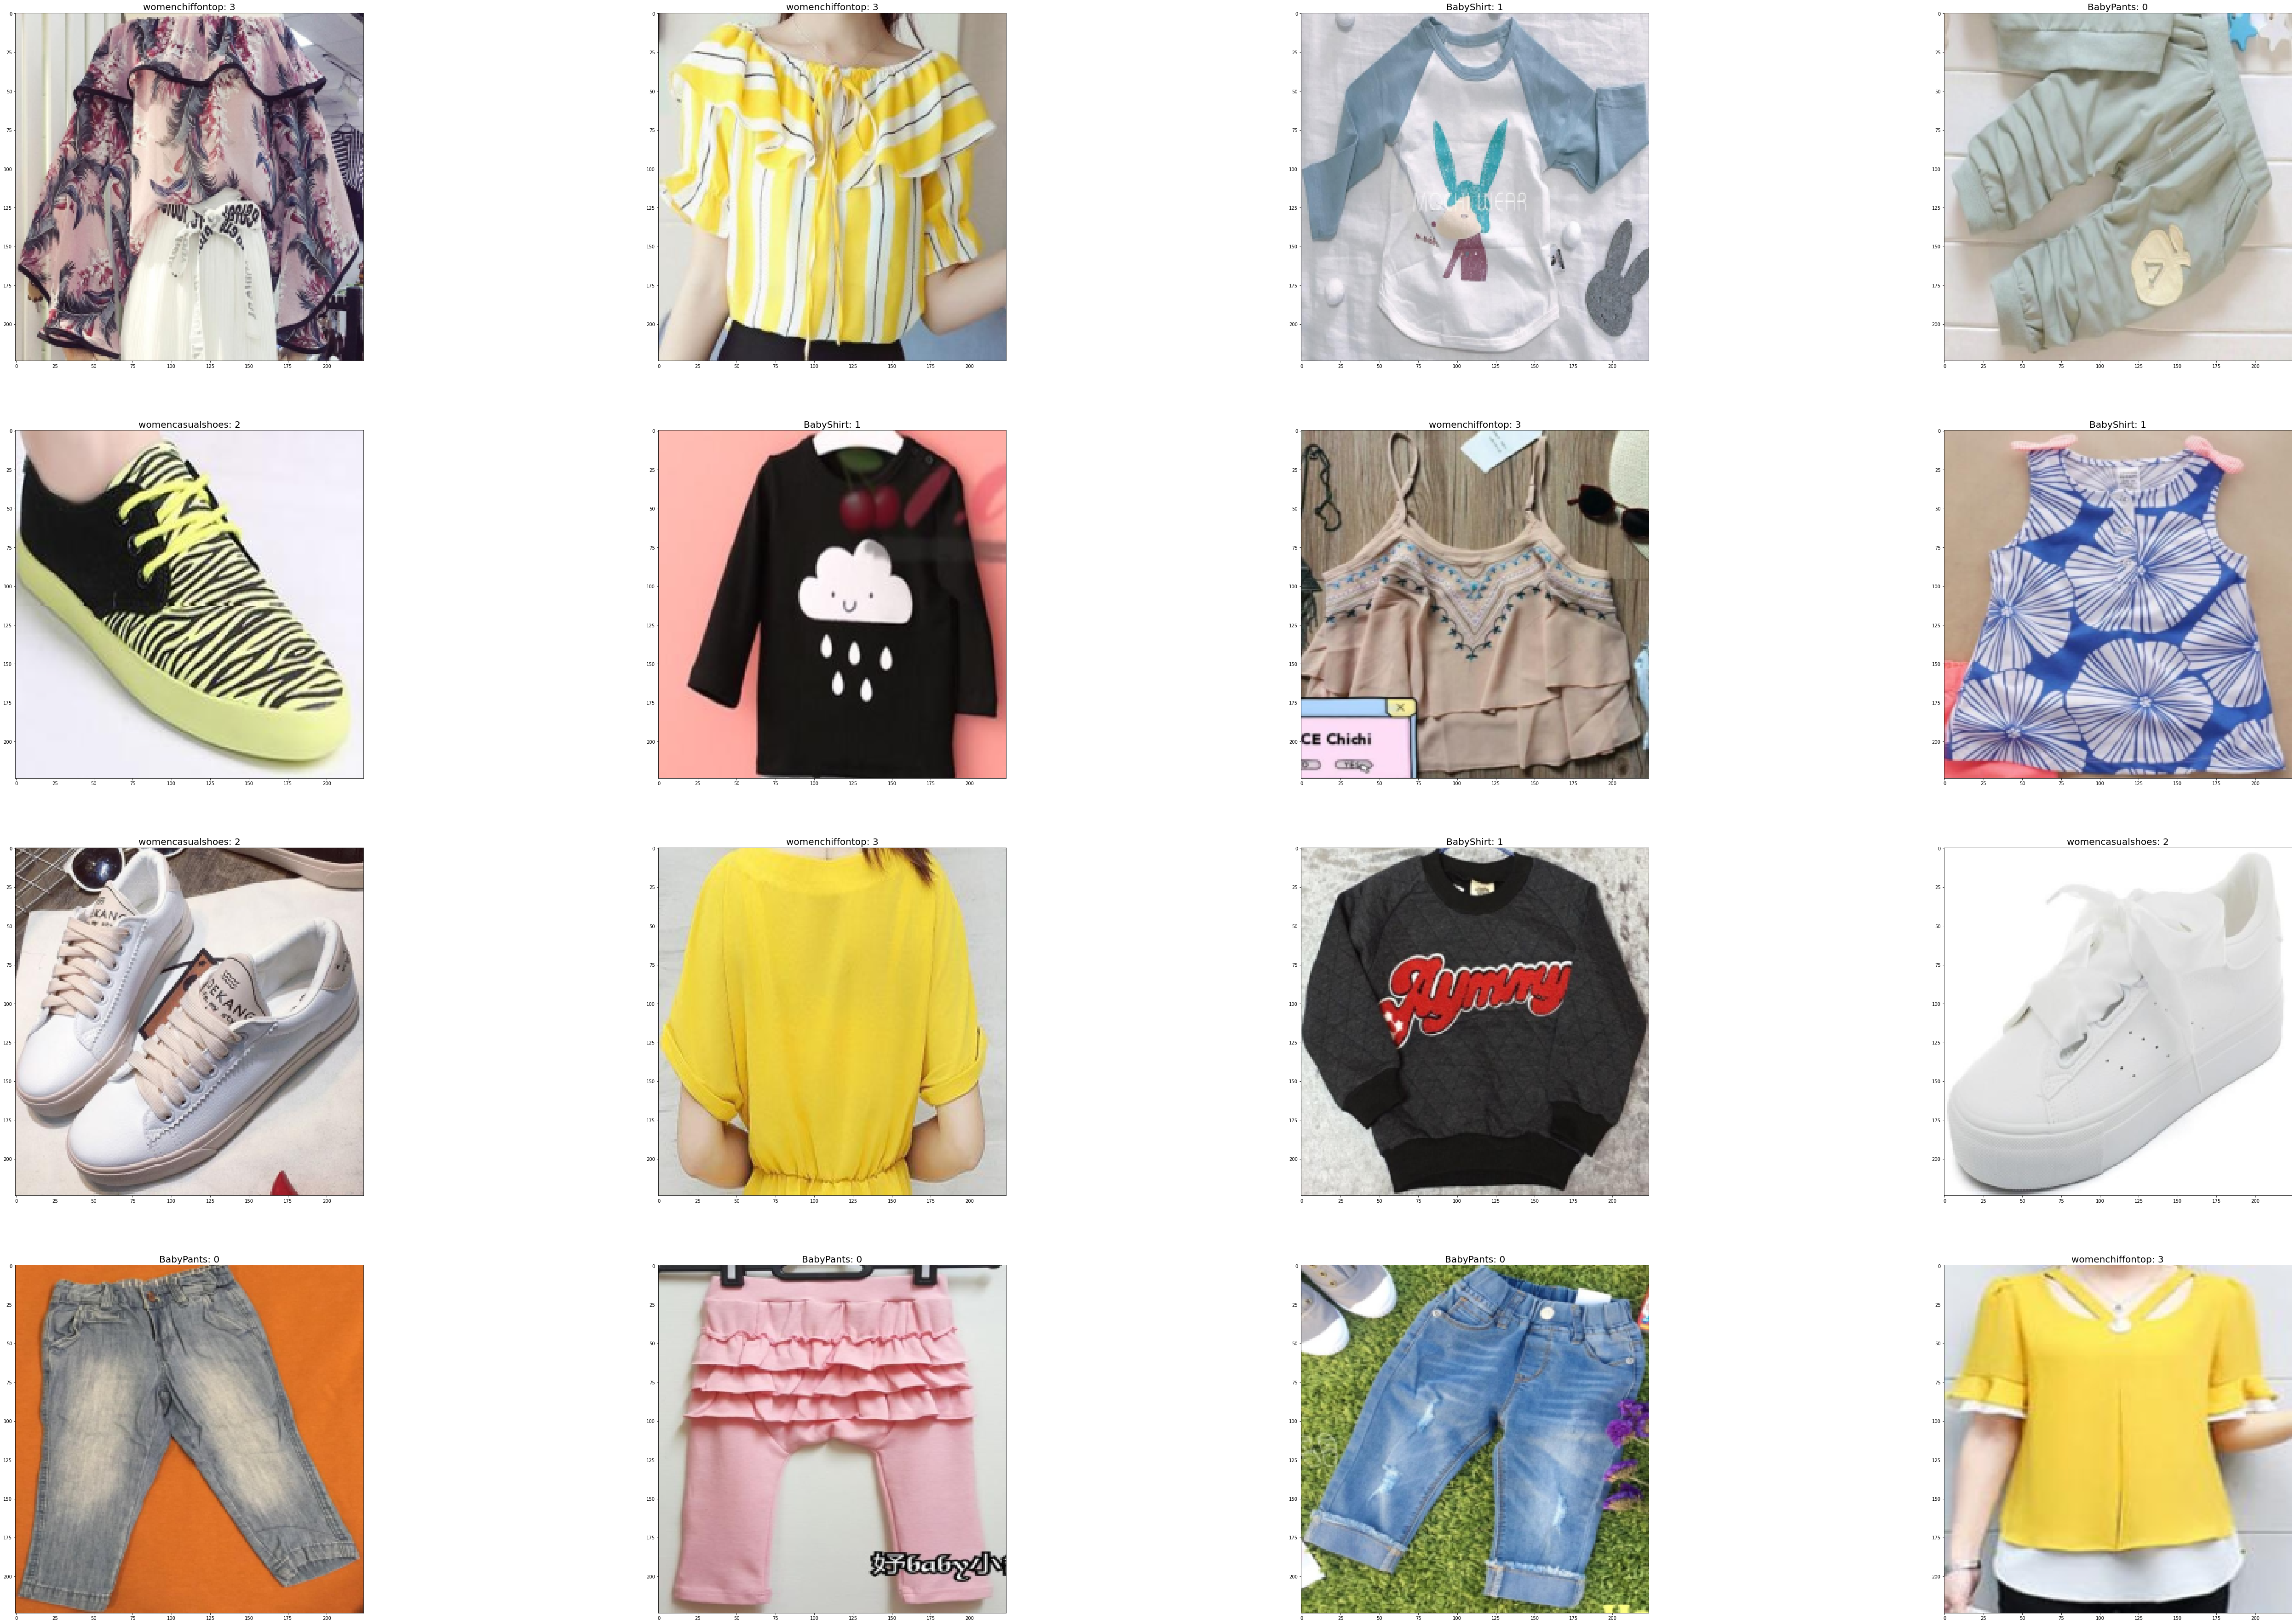

In [4]:
all_data.show_images()

## Create AutoGluon Dataset

For demonstration purposes, we use a subset of the [Shopee-IET dataset](https://www.kaggle.com/c/shopee-iet-machine-learning-competition/data) from Kaggle.
Each image in this data depicts a clothing item and the corresponding label specifies its clothing category.
Our subset of the data contains the following possible labels: `BabyPants`, `BabyShirt`, `womencasualshoes`, `womenchiffontop`.



In [5]:
train_dataset, _, test_dataset = ImageDataset.from_folders('../input/shopeeiet-dataset/shopee-iet/data/')
print(train_dataset)

                                                 image  label
0    /kaggle/input/shopeeiet-dataset/shopee-iet/dat...      0
1    /kaggle/input/shopeeiet-dataset/shopee-iet/dat...      0
2    /kaggle/input/shopeeiet-dataset/shopee-iet/dat...      0
3    /kaggle/input/shopeeiet-dataset/shopee-iet/dat...      0
4    /kaggle/input/shopeeiet-dataset/shopee-iet/dat...      0
..                                                 ...    ...
795  /kaggle/input/shopeeiet-dataset/shopee-iet/dat...      3
796  /kaggle/input/shopeeiet-dataset/shopee-iet/dat...      3
797  /kaggle/input/shopeeiet-dataset/shopee-iet/dat...      3
798  /kaggle/input/shopeeiet-dataset/shopee-iet/dat...      3
799  /kaggle/input/shopeeiet-dataset/shopee-iet/dat...      3

[800 rows x 2 columns]


# Use AutoGluon to Fit Models

Now, we fit a classifier using AutoGluon as follows:

In [6]:
predictor = ImagePredictor()
# since the original dataset does not provide validation split, the `fit` function splits it randomly with 90/10 ratio
predictor.fit(train_dataset, hyperparameters={'epochs': 50})  # you can trust the default config, we reduce the # epoch to save some build time


42433KB [00:01, 21722.32KB/s]                           


In [7]:
fit_result = predictor.fit_summary()
print('Top-1 train acc: %.3f, val acc: %.3f' %(fit_result['train_acc'], fit_result['valid_acc']))

Top-1 train acc: 0.832, val acc: 0.912


# Predict on a New Image
Given an example image, we can easily use the final model to predict the label (and the conditional class-probability denoted as score):

In [8]:
image_path = test_dataset.iloc[0]['image']
result = predictor.predict(image_path)
print(result)

0    0
Name: label, dtype: int64


If probabilities of all categories are needed, you can call predict_proba:



In [9]:
proba = predictor.predict_proba(image_path)
print(proba)

         0         1         2         3
0  0.67866  0.312981  0.004438  0.003921


You can also feed in multiple images all together, let’s use images in test dataset as an example:



In [10]:
bulk_result = predictor.predict(test_dataset)
print(bulk_result)

0     0
1     0
2     0
3     0
4     0
     ..
75    3
76    3
77    3
78    3
79    3
Name: label, Length: 80, dtype: int64


# Generate image features with a classifier


In [11]:
image_path = test_dataset.iloc[0]['image']
feature = predictor.predict_feature(image_path)
print(feature)

                                       image_feature
0  [1.1881497, 0.42808545, 0.1539286, 0.018741947...


/opt/conda/lib/python3.7/site-packages/mxnet/gluon/block.py:682: UserWarning: Parameter resnetv1b_dense0_weight, resnetv1b_dense0_bias is not used by any computation. Is this intended?
  out = self.forward(*args)


# Evaluate on Test Dataset

You can evaluate the classifier on a test dataset rather than retrieving the predictions.
The validation and test top-1 accuracy are:

In [12]:
test_acc, _ = predictor.evaluate(test_dataset)
print('Top-1 test acc: %.3f' % test_acc)

Top-1 test acc: 0.863


# Save and load classifiers
You can directly save the instances of classifiers:

In [13]:
filename = 'predictor.ag'
predictor.save(filename)
predictor_loaded = ImagePredictor.load(filename)
# use predictor_loaded as usual
result = predictor_loaded.predict(image_path)
print(result)

0    0
Name: label, dtype: int64


# Reference :
This section provides more resources on the topic if you are looking to go deeper.



* https://github.com/awslabs/autogluon